### <2장 대표적인 연속형 확률 분포 >  
교재 8장
1) 정규분포
2) 지수분포
3) 카이제곱분포
4) t 분포
5) F 분포

In [6]:
# 0. 준비하기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision %.3f
%matplotlib inline

linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return f(x) * g(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X,g)
    def integrand(x):
        return (g(x)-mean)**2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]


def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected value : {E(X):.3f}')
    print(f'variance value : {V(X):.3f}')

def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', ls='--', color='gray')
    ax.legend()
    plt.show()
    

In [7]:
# [ 1. 정규 분포 ]
# 1) 평균 µ, 분산 σ^2 ~ N(µ, σ^2)

# 2) E(X) =  µ, V(X) = σ^2

# 3) aX+b ~ N(aµ+b, a^2σ^2)

# 4) [ 표준 정규 분포 ] : Z ~ N(0, 1)
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2 / (2*sigma**2))
    return x_range, f

expected value : 2.000
variance value : 0.250


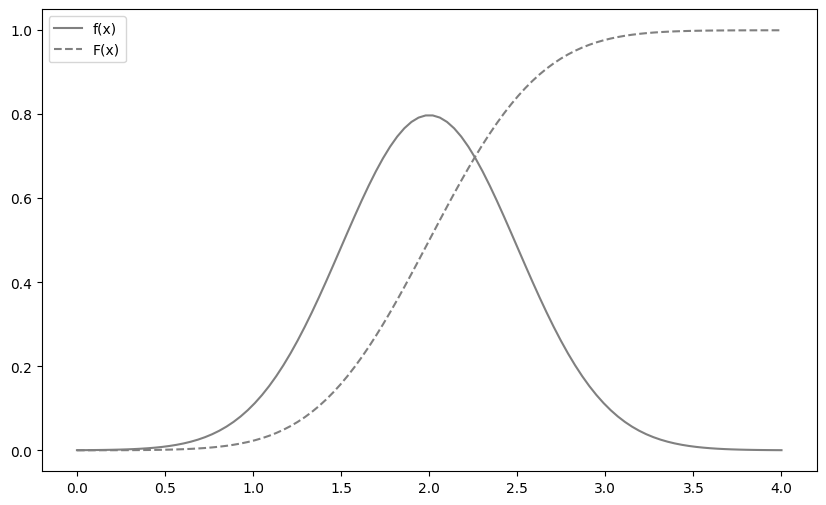

In [9]:
# N(2, 0.5^2) 일 때
mu, sigma = 2, 0.5
X = N(mu, sigma)
check_prob(X)
plot_prob(X, 0, 4)

In [11]:
rv = stats.norm(2, 0.5)
rv.mean(), rv.var() # 기대값, 분산

(2.000, 0.250)

In [12]:
# 밀도 함수
rv.pdf(2)

0.798

In [14]:
# [ 3. 카이제곱분포 ]
# 1) 독립성 검정이나 분산의 구간추정에 사용
#   : Z_1 ~ Z_n 이 서로 독립이고 N(0,1)
#     -> sum(Z_n^2) 의 확률 분포 = 자유도가 n인 카이제곱분포

# 2) 자유도 10으로 무작위 추출한 표본크기 100만인 표본 데이터
n = 10; rv = stats.norm()
sample_size = int(1e6)
Zs_sample = rv.rvs((n, sample_size))    # 표준정규분포에서 표본 크기 100만, 무작위
# axis=0에서 총합, 표준정규분포의 제곱합 표본 데이터를 구함
chi2_sample = np.sum(Zs_sample**2, axis=0)

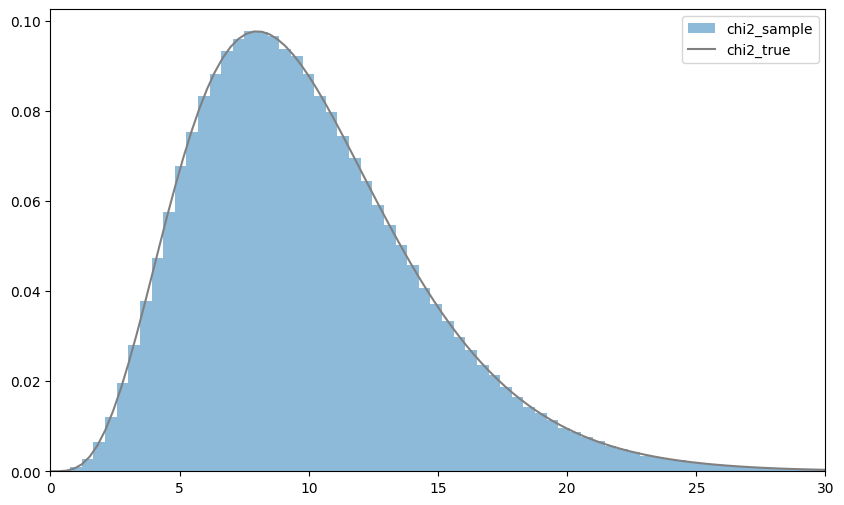

In [15]:
# 3) X^2(10)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True, alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label='chi2_true', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

In [16]:
# [ 간단 정리 ] 카이제곱분포
# 1) 좌우비대칭, 오른쪽으로 넓어짐
# 2) 자유도가 크면 좌우대칭에 가까움
# 3) 자유도의 값 가까이에 분포의 정점이 있음
# - 파라미터 n, scipy.stats chi2(n)

In [17]:
# [ 4. t 분포 ]
# 1) 확률 변수 Z, Y는 서로 독립, 
#    Z는 표준정규분포 N(0,1)을, Y는 자유도가 n인 카이제곱분포 X^(n)를 따를 때
# 
# [ 간단 정리 ]
# 1) 좌우대칭
# 2) 표준정규분포보다 양쪽 끝이 두꺼움
# 3) 자유도가 크면 표준정규분포에 가까워짐
# - 파라미터 n, scipy.stats t(n)

In [ ]:
# [ 5. F 분포 ]
# 1) 확률 변수 Y1, Y2는 서로 독립,  
#    Y1은 자유도가 n1인 카이제곱분포 X1^(n1),
#    Y2은 자유도가 n2인 카이제곱분포 X2^(n2)를 따를 때
# 
# [ 간단 정리 ]
# 1) 좌우비대칭, 오른쪽으로 넓어짐
# 2) 분포의 정점은 1에 가까움